In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
user_actions = pd.read_csv('../data/dup/user_app_actions.csv')
print user_actions.shape
user_actions.head()

(6003471, 3)


,userID,installTime,appID
0,1,182032,933
1,5,141354,589
2,5,251727,565
3,5,260932,596
4,5,261318,536


In [3]:
print 'userID:',len(pd.unique(user_actions['userID']))
print 'appID:',len(pd.unique(user_actions['appID']))

userID: 781112
appID: 100923


In [3]:
user_actions['showTime'] = user_actions['installTime'].apply(lambda x:int(x/100))
d26 = user_actions[(user_actions['installTime']>=260000)&(user_actions['installTime']<270000)]

In [6]:
d26['count'] = 1
d = d26.groupby(['appID','showTime'],as_index=False)['count'].sum()
d.head()

/home/hadoop/env2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,appID,showTime,count
0,354,2601,1
1,354,2602,4
2,354,2603,1
3,354,2604,3
4,354,2606,1


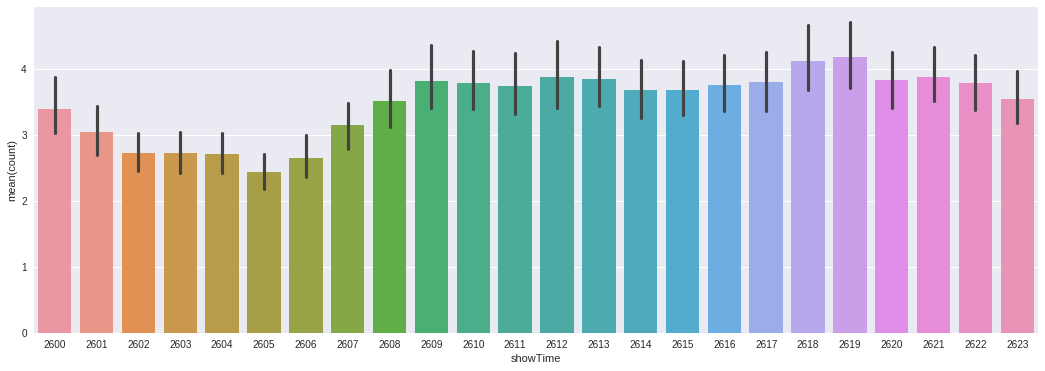

In [7]:
plt.figure(figsize=(18,6))
sns.barplot(x='showTime',y='count',data=d)
plt.show()